<a href="https://colab.research.google.com/github/Rizwanali324/Athlete_Ferritin_Projection/blob/Analysis/sport_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Define the file path
file_path = '/content/drive/MyDrive/Datasets/Athlete Data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [21]:
df.sample(5)

,Sex,Sport,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
35,female,Netball,4.56,13.3,42.2,13.6,20,19.16,49.0,11.29,53.14,176.8,59.9
132,male,BBall,5.17,8.0,47.9,16.4,36,25.93,88.9,14.53,97.00,209.4,113.7
187,male,WPolo,5.02,6.1,43.6,14.8,87,23.07,52.8,8.84,68.00,179.6,74.4
196,male,WPolo,4.86,8.9,46.9,15.8,65,23.58,57.7,10.25,68.00,179.9,76.3
85,female,T400m,4.32,6.8,40.6,13.7,46,17.54,54.6,12.16,46.12,173.0,52.5


#EDA

In [22]:
df.shape   #what is shape of data

(202, 13)

In [23]:
df.info() #data types and info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     202 non-null    object 
 1   Sport   202 non-null    object 
 2   RCC     202 non-null    float64
 3   WCC     202 non-null    float64
 4   Hc      202 non-null    float64
 5   Hg      202 non-null    float64
 6   Ferr    202 non-null    int64  
 7   BMI     202 non-null    float64
 8   SSF     202 non-null    float64
 9   %Bfat   202 non-null    float64
 10  LBM     202 non-null    float64
 11  Ht      202 non-null    float64
 12  Wt      202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [24]:
df.skew()   #skewness of data

<ipython-input-24-ef27e0b4dffa>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()   #skewness of data


RCC      0.419123
WCC      0.841311
Hc       0.277288
Hg       0.177254
Ferr     1.290184
BMI      0.953611
SSF      1.183475
%Bfat    0.765242
LBM      0.361197
Ht      -0.200797
Wt       0.242432
dtype: float64

In [25]:
df.describe() #summary statistic

,RCC,WCC,Hc,Hg,Ferr,BMI,SSF,%Bfat,LBM,Ht,Wt
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.008168
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925574
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000


In [26]:
df.isnull().sum()

Sex      0
Sport    0
RCC      0
WCC      0
Hc       0
Hg       0
Ferr     0
BMI      0
SSF      0
%Bfat    0
LBM      0
Ht       0
Wt       0
dtype: int64

In [27]:
# Assuming your dataset is stored in a DataFrame called 'df'
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in the '{column}' column:", unique_values)


Unique values in the 'Sex' column: ['female' 'male']
Unique values in the 'Sport' column: ['BBall' 'Row' 'Netball' 'Swim' 'Field' 'T400m' 'TSprnt' 'Tennis' 'Gym'
 'WPolo']


#Body Composition Across Different Sports:

<ipython-input-43-2ae20172ddb9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sport_gender_grouped = df.groupby(['Sport', 'Sex']).mean()[['LBM', '%Bfat']]


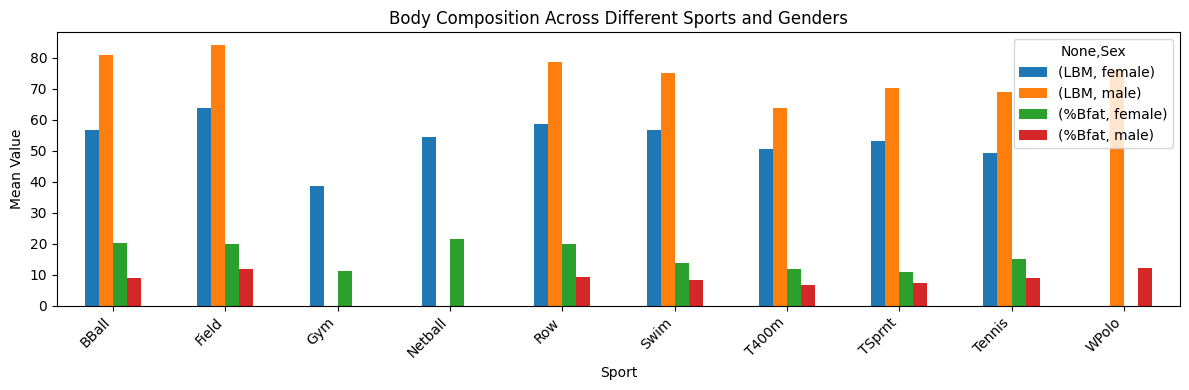

LBM      %Bfat
Sport   Sex                         
BBall   female  56.659231  20.266154
        male    80.833333   8.893333
Field   female  63.688571  19.975714
        male    83.916667  11.907500
Gym     female  38.660000  11.317500
Netball female  54.263043  21.609130
Row     female  58.419545  19.791364
        male    78.666667   9.409333
Swim    female  56.497778  13.887778
        male    74.923077   8.296154
T400m   female  50.377273  11.821818
        male    63.611111   6.685556
TSprnt  female  53.212500  10.895000
        male    70.272727   7.287273
Tennis  female  49.100000  15.045714
        male    68.750000   9.080000
WPolo   male    75.941176  12.245294

In [43]:
# Group by both 'Sport' and 'Sex' and calculate mean values for body composition metrics
sport_gender_grouped = df.groupby(['Sport', 'Sex']).mean()[['LBM', '%Bfat']]

# Plotting
fig, ax = plt.subplots(figsize=(12, 4))
sport_gender_grouped.unstack().plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Value')
ax.set_title('Body Composition Across Different Sports and Genders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
sport_gender_grouped

some insights regarding the impact of sports on athletes' body composition:

1. **Lean Body Mass (LBM) Insights:**
   - **Basketball (BBall) and Field Sports (Field, Row):** These sports show higher average LBM, suggesting that they may contribute to greater muscle development, especially among male athletes.
   - **Gym and Tennis:** These sports exhibit lower average LBM, particularly in females. These sports may focus on different aspects of fitness, potentially with less emphasis on muscle mass.

2. **Percentage Body Fat (%Bfat) Insights:**
   - **Basketball (BBall), Netball, and Field Sports (Field, Row):** These sports, especially among females, have higher average %Bfat. This might be attributed to the nature of the sports or specific training regimens that prioritize strength and power.
   - **Gym and Tennis:** These sports have lower average %Bfat, indicating a potential emphasis on body fat reduction or maintenance.

3. **Sex Differences:**
   - **Male vs. Female:** Across various sports, males generally have higher LBM and lower %Bfat compared to females. This aligns with typical physiological differences between male and female athletes.

4. **Water Polo (WPolo) Specifics:**
   - **WPolo:** Among males, Water Polo stands out with a relatively higher LBM and moderate %Bfat. This suggests a unique physical demand for water polo players, potentially involving both strength and endurance components.

5. **Consideration for Training Programs:**
   - **Tailored Training:** Sports with higher LBM may consider incorporating strength and muscle-building exercises into training programs. Conversely, sports with lower LBM may focus on different aspects, such as agility or endurance.
   - **Nutritional Emphasis:** Sports with higher %Bfat might benefit from nutritional interventions aimed at optimizing body composition without compromising performance.

It's important to note that these insights are preliminary, and a more in-depth analysis, including statistical testing, would be necessary to draw robust conclusions about the impact of sports on athletes' physical markers.

# 2. How do male and female athletes differ in physical markers across different sports?

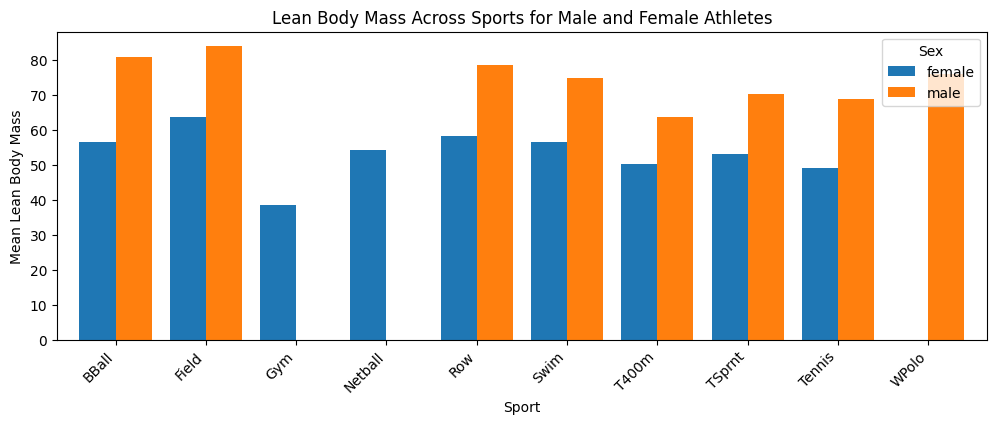

Sex,female,male
Sport,,
BBall,56.659231,80.833333
Field,63.688571,83.916667
Gym,38.660000,NaN
Netball,54.263043,NaN
Row,58.419545,78.666667
Swim,56.497778,74.923077
T400m,50.377273,63.611111
TSprnt,53.212500,70.272727
Tennis,49.100000,68.750000


In [29]:

sex_sport_grouped = df.groupby(['Sport', 'Sex']).mean().unstack()['LBM']
sex_sport_grouped.plot(kind='bar', figsize=(12, 4), width=0.8)
plt.title('Lean Body Mass Across Sports for Male and Female Athletes')
plt.ylabel('Mean Lean Body Mass')
plt.xlabel('Sport')
plt.legend(title='Sex')
plt.xticks(rotation=45, ha='right')

plt.show()

sex_sport_grouped

# 3. Is there a relationship between BMI and Plasma Ferritin concentration?

<ipython-input-45-83e8feea4884>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bmi_grouped = df.groupby('BMI_Category').mean()['Ferr']


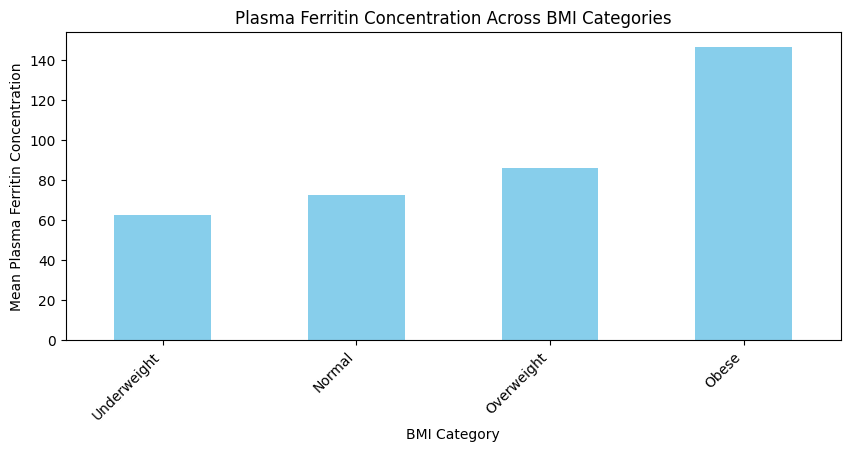

BMI_Category
Underweight     62.500000
Normal          72.638158
Overweight      86.305556
Obese          146.833333
Name: Ferr, dtype: float64

In [45]:

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
bmi_grouped = df.groupby('BMI_Category').mean()['Ferr']
bmi_grouped.plot(kind='bar', figsize=(10, 4), color='skyblue')
plt.title('Plasma Ferritin Concentration Across BMI Categories')
plt.ylabel('Mean Plasma Ferritin Concentration')
plt.xlabel('BMI Category')

plt.xticks(rotation=45, ha='right')
plt.show()

bmi_grouped

## 4. How do Red Cell Count (RCC) and White Cell Count (WCC) vary across sports?


<ipython-input-35-95e849e6b14a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sport_grouped_cells = df.groupby(['Sport','Sex']).mean()[['RCC', 'WCC']]


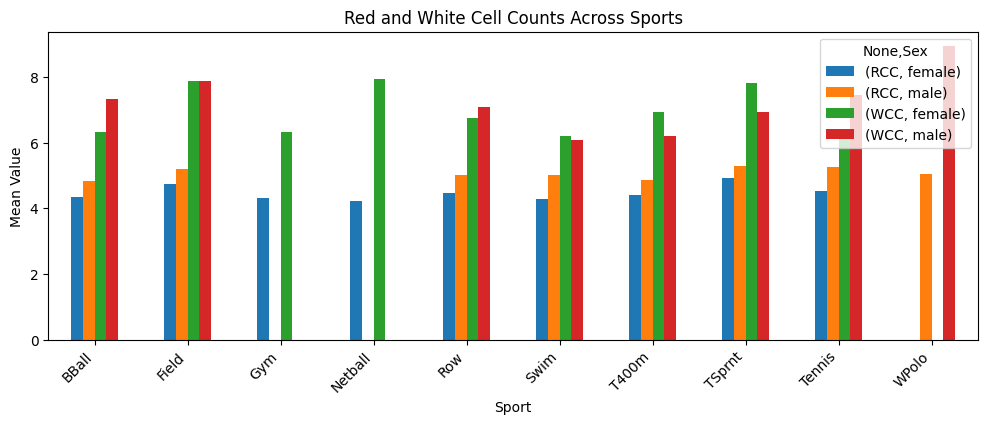

RCC       WCC
Sport   Sex                       
BBall   female  4.337692  6.307692
        male    4.821667  7.333333
Field   female  4.747143  7.857143
        male    5.185833  7.858333
Gym     female  4.307500  6.325000
Netball female  4.227391  7.930435
Row     female  4.455455  6.759091
        male    5.004000  7.086667
Swim    female  4.291111  6.211111
        male    5.007692  6.076923
T400m   female  4.396364  6.927273
        male    4.871111  6.186111
TSprnt  female  4.927500  7.800000
        male    5.290000  6.918182
Tennis  female  4.522857  6.100000
        male    5.260000  7.450000
WPolo   male    5.032353  8.923529

In [35]:
sport_grouped_cells = df.groupby(['Sport','Sex']).mean()[['RCC', 'WCC']]
sport_grouped_cells.unstack().plot(kind='bar', figsize=(12, 4))
plt.title('Red and White Cell Counts Across Sports')
plt.ylabel('Mean Value')
plt.xlabel('Sport')

plt.xticks(rotation=45, ha='right')
plt.show()
sport_grouped_cells

 some helpful insights in terms of sports and physiological markers (RCC and WCC):

### Red Cell Count (RCC) Insights:

1. **Cardiovascular Demands:**
   - **Higher RCC in Rowing (Row) and Tennis:** These sports may impose greater cardiovascular demands on athletes, possibly due to the need for sustained endurance.

2. **Training Implications:**
   - **Lower RCC in Gym and Netball:** Gym activities might focus on strength training rather than endurance, while the lower RCC in Netball may suggest a different physiological demand, possibly emphasizing agility and short bursts of activity.

3. **Gender Differences:**
   - **Consistent Gender Differences:** Across most sports, males tend to have slightly higher RCC than females

### White Cell Count (WCC) Insights:

1. **Immune Response and Stress:**
   - **Higher WCC in Water Polo (WPolo) among Males:** Water Polo athletes may experience higher stress levels or a different immune response due to the nature of the sport, which involves both physical contact and swimming.

2. **Physiological Stress in Basketball (BBall) and Field Sports:**
   - **Higher WCC in BBall and Field Sports (Field, Row):** These sports involve physical contact or high-intensity activities, potentially leading to a heightened immune response.




## 5. Can we identify sports with a potential impact on Plasma Ferritin levels after controlling for body composition?


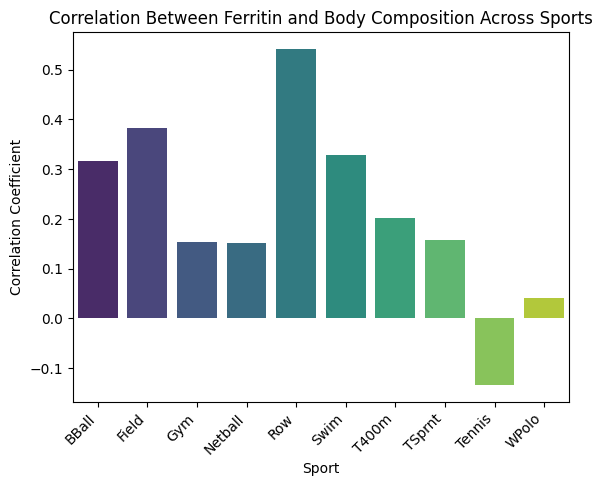

,Sport,Correlation
0,BBall,0.315790
1,Field,0.382847
2,Gym,0.154359
3,Netball,0.151338
4,Row,0.541536
5,Swim,0.327500
6,T400m,0.202429
7,TSprnt,0.157391
8,Tennis,-0.133809
9,WPolo,0.040107


In [39]:
sport_grouped_corr = df.groupby('Sport').apply(lambda x: x[['Ferr', 'LBM', '%Bfat']].corr().iloc[0, 1]).reset_index()
sport_grouped_corr.columns = ['Sport', 'Correlation']
sns.barplot(x='Sport', y='Correlation', data=sport_grouped_corr, palette='viridis')
plt.title('Correlation Between Ferritin and Body Composition Across Sports')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Sport')
plt.xticks(rotation=45, ha='right')

plt.show()
sport_grouped_corr

 some valuable insights drawn from the correlation analysis between Plasma Ferritin concentration and body composition markers for different sports:

1. **Sport-Specific Relationships:**
   - **Diversity in Correlations:** The correlations between Plasma Ferritin and body composition markers vary across sports. This indicates that the relationship between iron levels (Plasma Ferritin) and body composition is influenced by the nature of the sport and the specific physiological demands it imposes.

2. **Positive Correlations in Endurance Sports:**
   - **Rowing (Row), Field Sports (Field), and Swimming (Swim):** These sports, which typically involve sustained endurance, show positive correlations. Athletes with higher Lean Body Mass (LBM) or Percentage Body Fat (%Bfat) may experience elevated Plasma Ferritin levels. This suggests a potential link between endurance-related training and iron status.

3. **Moderate Correlations in Basketball (BBall):**
   - **Basketball (BBall):** Basketball, a sport that combines elements of endurance and strength, shows a moderate positive correlation. This implies that athletes with certain body composition characteristics may have higher Plasma Ferritin concentrations.

4. **Weak Correlations in Speed and Power Sports:**
   - **Tennis and Water Polo (WPolo):** These sports, characterized by speed, agility, and power, exhibit weak correlations. The weak positive correlation in Water Polo suggests a subtle association, while the weak negative correlation in Tennis is intriguing and requires further exploration.

5. **Consideration for Iron Metabolism:**
   - **T400m and Gym:** These sports show weak correlations, indicating a potential but less clear relationship between body composition and Plasma Ferritin. Considering the diverse physiological demands of these sports, iron metabolism may be influenced by factors beyond body composition.

6. **Negative Correlation in Tennis:**
   - **Tennis:** The weak negative correlation in Tennis is noteworthy. It suggests that, in the context of this dataset, athletes with higher LBM or %Bfat in tennis may have lower Plasma Ferritin concentrations. This unexpected finding warrants further investigation into potential factors influencing iron status in tennis athletes.

7. **Practical Implications for Training and Nutrition:**
   - **Tailoring Strategies:** Understanding sport-specific correlations can inform the development of tailored training and nutritional strategies. Sports with stronger correlations may necessitate closer monitoring of iron status and targeted interventions.

8. **Limitations and Further Research:**
   - **Causation vs. Correlation:** Correlation does not imply causation. Further research, including controlled studies and consideration of additional factors, is needed to establish causal relationships.

These insights can guide sports scientists, coaches, and nutritionists in developing personalized strategies for athletes based on the demands of their respective sports and potential implications for iron status and overall health.